# Creating a DataFrame

In [37]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

#  Import and read the data 
NYPD_complaints_df = pd.read_csv("Resources/NYPD_Complaint_Data.csv")
NYPD_complaints_df.head()

In [2]:
# Get the datatypes and Null Values for each column
NYPD_complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323817 entries, 0 to 323816
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                323817 non-null  int64  
 1   ADDR_PCT_CD               323817 non-null  int64  
 2   BORO_NM                   323046 non-null  object 
 3   CMPLNT_FR_DT              323817 non-null  object 
 4   CMPLNT_FR_TM              323817 non-null  object 
 5   CMPLNT_TO_DT              294620 non-null  object 
 6   CMPLNT_TO_TM              294733 non-null  object 
 7   CRM_ATPT_CPTD_CD          323656 non-null  object 
 8   HADEVELOPT                1177 non-null    object 
 9   HOUSING_PSA               24237 non-null   float64
 10  JURISDICTION_CODE         323460 non-null  float64
 11  JURIS_DESC                323817 non-null  object 
 12  KY_CD                     323817 non-null  int64  
 13  LAW_CAT_CD                323817 non-null  o

In [4]:
# Get summary statistics for numerical columns
NYPD_complaints_df.describe()

,CMPLNT_NUM,ADDR_PCT_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,PD_CD,TRANSIT_DISTRICT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,3.238170e+05,323817.000000,24237.000000,323460.000000,323817.000000,323460.000000,6325.000000,3.238170e+05,323817.000000,323817.000000,323817.000000
mean,5.506657e+08,63.740548,6745.500640,0.471768,306.535515,400.922504,13.237628,1.005431e+06,207693.746465,40.736705,-73.923545
std,2.596358e+08,34.909937,13664.667373,5.126253,160.636455,217.947338,12.240797,2.138290e+04,30198.183851,0.082891,0.077115
min,1.000004e+08,1.000000,218.000000,0.000000,101.000000,100.000000,1.000000,9.136820e+05,121312.000000,40.499401,-74.253767
25%,3.261123e+08,40.000000,483.000000,0.000000,117.000000,254.000000,2.000000,9.922970e+05,185103.000000,40.674682,-73.970987
50%,5.511581e+08,63.000000,696.000000,0.000000,341.000000,352.000000,11.000000,1.004560e+06,206925.000000,40.734574,-73.926714
75%,7.754592e+08,101.000000,1251.000000,0.000000,351.000000,638.000000,23.000000,1.017326e+06,235133.000000,40.812015,-73.880573
max,9.999958e+08,123.000000,72200.000000,97.000000,678.000000,922.000000,34.000000,1.067185e+06,271820.000000,40.912723,-73.700720


In [5]:
# Explore the percentage of null values in each column
NYPD_complaints_df.isna().mean() * 100

CMPLNT_NUM                   0.000000
ADDR_PCT_CD                  0.000000
BORO_NM                      0.238097
CMPLNT_FR_DT                 0.000000
CMPLNT_FR_TM                 0.000000
CMPLNT_TO_DT                 9.016512
CMPLNT_TO_TM                 8.981616
CRM_ATPT_CPTD_CD             0.049719
HADEVELOPT                  99.636523
HOUSING_PSA                 92.515217
JURISDICTION_CODE            0.110247
JURIS_DESC                   0.000000
KY_CD                        0.000000
LAW_CAT_CD                   0.000000
LOC_OF_OCCUR_DESC           16.754525
OFNS_DESC                    0.002162
PARKS_NM                    99.256061
PATROL_BORO                  0.110247
PD_CD                        0.110247
PD_DESC                      0.110247
PREM_TYP_DESC                0.265273
RPT_DT                       0.000000
STATION_NAME                98.046736
SUSP_AGE_GROUP              19.378847
SUSP_RACE                   19.378847
SUSP_SEX                    19.378847
TRANSIT_DIST

In [6]:
#Explore the Shape of the Data
NYPD_complaints_df.shape

(323817, 36)

## Looking at Crime by Boro

In [7]:
NYPD_complaints_df['PATROL_BORO'].value_counts()

PATROL BORO BRONX            67994
PATROL BORO BKLYN SOUTH      46133
PATROL BORO BKLYN NORTH      45368
PATROL BORO MAN NORTH        40966
PATROL BORO MAN SOUTH        38851
PATROL BORO QUEENS NORTH     37396
PATROL BORO QUEENS SOUTH     32898
PATROL BORO STATEN ISLAND    13854
Name: PATROL_BORO, dtype: int64

In [8]:
NYPD_complaints_df[NYPD_complaints_df['PATROL_BORO'] == 'PATROL BORO BKLYN SOUTH']['OFNS_DESC'].value_counts()

PETIT LARCENY                           8647
HARRASSMENT 2                           8108
CRIMINAL MISCHIEF & RELATED OF          4819
ASSAULT 3 & RELATED OFFENSES            4810
GRAND LARCENY                           3625
FELONY ASSAULT                          2274
OFF. AGNST PUB ORD SENSBLTY &           2095
MISCELLANEOUS PENAL LAW                 1915
BURGLARY                                1270
ROBBERY                                  988
VEHICLE AND TRAFFIC LAWS                 970
GRAND LARCENY OF MOTOR VEHICLE           946
FORGERY                                  800
DANGEROUS DRUGS                          700
SEX CRIMES                               661
DANGEROUS WEAPONS                        629
THEFT-FRAUD                              467
INTOXICATED & IMPAIRED DRIVING           405
OFFENSES INVOLVING FRAUD                 341
FRAUDS                                   297
OFFENSES AGAINST PUBLIC ADMINI           270
CRIMINAL TRESPASS                        205
RAPE      

In [9]:
NYPD_complaints_df[NYPD_complaints_df['PATROL_BORO'] == 'PATROL BORO BRONX']['OFNS_DESC'].value_counts()

HARRASSMENT 2                           11985
PETIT LARCENY                            9627
ASSAULT 3 & RELATED OFFENSES             8950
CRIMINAL MISCHIEF & RELATED OF           6882
GRAND LARCENY                            4752
FELONY ASSAULT                           4617
OFF. AGNST PUB ORD SENSBLTY &            2984
ROBBERY                                  2756
GRAND LARCENY OF MOTOR VEHICLE           2099
MISCELLANEOUS PENAL LAW                  1763
BURGLARY                                 1599
DANGEROUS DRUGS                          1509
OFFENSES AGAINST PUBLIC ADMINI           1446
VEHICLE AND TRAFFIC LAWS                 1401
SEX CRIMES                               1064
DANGEROUS WEAPONS                         953
OFFENSES INVOLVING FRAUD                  555
FORGERY                                   516
THEFT-FRAUD                               375
INTOXICATED & IMPAIRED DRIVING            307
RAPE                                      267
OFFENSES AGAINST THE PERSON       

## Dropping Columns with more than 20% Null Values and latitude / longitude columns

In [10]:
NYPD_complaints_df = NYPD_complaints_df.drop(columns=["HADEVELOPT","HOUSING_PSA","PARKS_NM","STATION_NAME",
                                                      "TRANSIT_DISTRICT","X_COORD_CD","Y_COORD_CD","Latitude",
                                                      "Longitude","Lat_Lon","New Georeferenced Column"])

In [11]:
NYPD_complaints_df.isna().mean() * 100

CMPLNT_NUM            0.000000
ADDR_PCT_CD           0.000000
BORO_NM               0.238097
CMPLNT_FR_DT          0.000000
CMPLNT_FR_TM          0.000000
CMPLNT_TO_DT          9.016512
CMPLNT_TO_TM          8.981616
CRM_ATPT_CPTD_CD      0.049719
JURISDICTION_CODE     0.110247
JURIS_DESC            0.000000
KY_CD                 0.000000
LAW_CAT_CD            0.000000
LOC_OF_OCCUR_DESC    16.754525
OFNS_DESC             0.002162
PATROL_BORO           0.110247
PD_CD                 0.110247
PD_DESC               0.110247
PREM_TYP_DESC         0.265273
RPT_DT                0.000000
SUSP_AGE_GROUP       19.378847
SUSP_RACE            19.378847
SUSP_SEX             19.378847
VIC_AGE_GROUP         0.000000
VIC_RACE              0.016985
VIC_SEX               0.000000
dtype: float64

In [20]:
#Drop Rows with Null Values
NYPD_complaints_df = NYPD_complaints_df.dropna()
NYPD_complaints_df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,...,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
46,691868447,23,MANHATTAN,09/24/2021,16:00:00,09/24/2021,16:15:00,COMPLETED,2.0,N.Y. HOUSING POLICE,...,749.0,VIOLATION OF ORDER OF PROTECTI,RESIDENCE - PUBLIC HOUSING,09/24/2021,25-44,BLACK,F,25-44,BLACK,F
47,425676279,23,MANHATTAN,09/30/2021,08:00:00,09/30/2021,08:21:00,COMPLETED,2.0,N.Y. HOUSING POLICE,...,101.0,ASSAULT 3,RESIDENCE - PUBLIC HOUSING,09/30/2021,25-44,BLACK,F,45-64,BLACK,M
49,129587304,78,BROOKLYN,09/30/2021,20:30:00,09/30/2021,20:40:00,COMPLETED,0.0,N.Y. POLICE DEPT,...,109.0,"ASSAULT 2,1,UNCLASSIFIED",STREET,09/30/2021,<18,WHITE HISPANIC,M,25-44,WHITE,F
52,795422135,10,MANHATTAN,09/26/2021,19:45:00,09/26/2021,19:55:00,COMPLETED,0.0,N.Y. POLICE DEPT,...,101.0,ASSAULT 3,STREET,09/26/2021,25-44,BLACK,M,45-64,ASIAN / PACIFIC ISLANDER,M
53,468374763,75,BROOKLYN,09/25/2021,13:20:00,09/25/2021,13:35:00,COMPLETED,0.0,N.Y. POLICE DEPT,...,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",STREET,09/25/2021,UNKNOWN,BLACK,M,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323808,452097812,66,BROOKLYN,01/02/2021,17:00:00,01/07/2021,08:00:00,COMPLETED,0.0,N.Y. POLICE DEPT,...,421.0,"LARCENY,GRAND FROM VEHICLE/MOTORCYCLE",STREET,01/07/2021,UNKNOWN,UNKNOWN,U,45-64,BLACK,F
323810,389339093,10,MANHATTAN,01/06/2021,00:40:00,01/06/2021,00:45:00,COMPLETED,0.0,N.Y. POLICE DEPT,...,389.0,"ROBBERY,DWELLING",RESIDENCE - APT. HOUSE,01/06/2021,UNKNOWN,BLACK,M,25-44,BLACK,M
323811,955486918,114,QUEENS,01/04/2021,18:00:00,01/04/2021,18:07:00,COMPLETED,2.0,N.Y. HOUSING POLICE,...,101.0,ASSAULT 3,RESIDENCE - PUBLIC HOUSING,01/04/2021,UNKNOWN,BLACK,F,25-44,BLACK,F
323814,675024556,66,BROOKLYN,12/25/2020,13:06:00,12/25/2020,13:08:00,COMPLETED,0.0,N.Y. POLICE DEPT,...,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",SYNAGOGUE,01/01/2021,45-64,WHITE,M,65+,WHITE,M


## Creating the Balanced Random Forest Classifier Model

In [21]:
df_binary = pd.get_dummies(NYPD_complaints_df, columns=["BORO_NM","CMPLNT_FR_DT", 
"CMPLNT_FR_TM", "CMPLNT_TO_DT", "CMPLNT_TO_TM","CRM_ATPT_CPTD_CD",
"JURIS_DESC","LAW_CAT_CD","LOC_OF_OCCUR_DESC","OFNS_DESC",
"PATROL_BORO","PD_DESC","PREM_TYP_DESC","RPT_DT",
"SUSP_AGE_GROUP","SUSP_RACE","SUSP_SEX","VIC_AGE_GROUP","VIC_RACE","VIC_SEX"])
x_cols = [i for i in df_binary if i not in ('OFNS_DESC')]
X = df_binary[x_cols]

# Create our target
y = NYPD_complaints_df["OFNS_DESC"]

In [22]:
X.describe()

,CMPLNT_NUM,ADDR_PCT_CD,JURISDICTION_CODE,KY_CD,PD_CD,BORO_NM_BRONX,BORO_NM_BROOKLYN,BORO_NM_MANHATTAN,BORO_NM_QUEENS,BORO_NM_STATEN ISLAND,...,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_UNKNOWN,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_SEX_D,VIC_SEX_E,VIC_SEX_F,VIC_SEX_M
count,2.018530e+05,201853.000000,201853.000000,201853.000000,201853.000000,201853.000000,201853.000000,201853.000000,201853.000000,201853.000000,...,201853.000000,201853.000000,201853.00000,201853.000000,201853.000000,201853.000000,201853.000000,201853.000000,201853.000000,201853.000000
mean,5.512815e+08,62.582488,0.457625,320.436263,389.403858,0.189717,0.281373,0.272604,0.218788,0.037517,...,0.079637,0.281695,0.04211,0.262637,0.146676,0.183980,0.188741,0.041709,0.436848,0.332703
std,2.596449e+08,35.354632,4.828235,166.738507,210.476692,0.392078,0.449670,0.445300,0.413425,0.190026,...,0.270731,0.449827,0.20084,0.440068,0.353784,0.387469,0.391304,0.199923,0.495997,0.471182
min,1.000026e+08,1.000000,0.000000,103.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.267314e+08,33.000000,0.000000,121.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.520925e+08,62.000000,0.000000,341.000000,339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.758666e+08,101.000000,0.000000,361.000000,638.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999864e+08,123.000000,97.000000,678.000000,922.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#Look at y value counts for binning
y_counts = y.value_counts()
y_counts

HARRASSMENT 2                           41901
PETIT LARCENY                           39230
ASSAULT 3 & RELATED OFFENSES            24811
CRIMINAL MISCHIEF & RELATED OF          15857
GRAND LARCENY                           15245
FELONY ASSAULT                          11679
OFF. AGNST PUB ORD SENSBLTY &            9996
MISCELLANEOUS PENAL LAW                  7937
ROBBERY                                  6358
BURGLARY                                 6156
SEX CRIMES                               3349
GRAND LARCENY OF MOTOR VEHICLE           3227
OFFENSES AGAINST PUBLIC ADMINI           2966
DANGEROUS DRUGS                          2425
THEFT-FRAUD                              1308
DANGEROUS WEAPONS                        1171
CRIMINAL TRESPASS                        1122
RAPE                                      899
FRAUDS                                    880
VEHICLE AND TRAFFIC LAWS                  787
UNAUTHORIZED USE OF A VEHICLE             667
FORGERY                           

<AxesSubplot:ylabel='Density'>

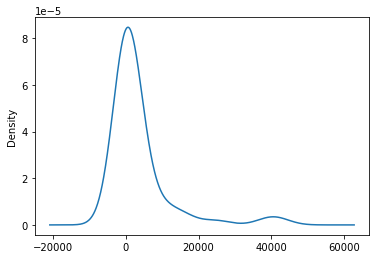

In [28]:
# Visualize the value counts of y
y_counts.plot.density()

In [33]:
# Determine which values to replace if counts are less than ...?
replace_y = list(y_counts[y_counts < 50].index)

# Replace in dataframe
for app in replace_y:
    y = y.replace(app,"Other")
    
# Check to make sure binning was successful
y.value_counts()

HARRASSMENT 2                     41901
PETIT LARCENY                     39230
ASSAULT 3 & RELATED OFFENSES      24811
CRIMINAL MISCHIEF & RELATED OF    15857
GRAND LARCENY                     15245
FELONY ASSAULT                    11679
OFF. AGNST PUB ORD SENSBLTY &      9996
MISCELLANEOUS PENAL LAW            7937
ROBBERY                            6358
BURGLARY                           6156
SEX CRIMES                         3349
GRAND LARCENY OF MOTOR VEHICLE     3227
OFFENSES AGAINST PUBLIC ADMINI     2966
DANGEROUS DRUGS                    2425
THEFT-FRAUD                        1308
DANGEROUS WEAPONS                  1171
CRIMINAL TRESPASS                  1122
RAPE                                899
FRAUDS                              880
VEHICLE AND TRAFFIC LAWS            787
UNAUTHORIZED USE OF A VEHICLE       667
FORGERY                             666
ADMINISTRATIVE CODE                 440
INTOXICATED & IMPAIRED DRIVING      440
OFFENSES INVOLVING FRAUD            386


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [35]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf_model = brf_model.fit(X_train, y_train)

In [38]:
# Calculated the balanced accuracy score
y_pred = brf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9935969068098528

In [39]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#cm_df = pd.DataFrame(
#   cm, index=["Actual high_risk", "Actual low_risk"],
#   columns=["Predicted high_risk", "Predicted low_risk"]
#)
#display(cm_df)
cm

array([[ 110,    0,    0, ...,    0,    0,    0],
       [   0,   51,    0, ...,    0,    0,    0],
       [   0,    0, 6203, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  325,    0,    0],
       [   0,    0,    0, ...,    0,  167,    0],
       [   0,    0,    0, ...,    0,    0,  197]])